In [1]:
from fastai.vision.widgets import *

In [2]:
from fastai import *

import fastbook
fastbook.setup_book()

In [3]:
#pip install -U fastai torch


In [4]:
from fastai.vision.all import *
path= untar_data(URLs.PETS)/'images'

In [5]:
def is_cat(x): return x[0].isupper()

In [6]:
dls= ImageDataLoaders.from_name_func('.',
    get_image_files(path),valid_pct=0.2,
    label_func=is_cat,
    item_tfms=Resize(192))

C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


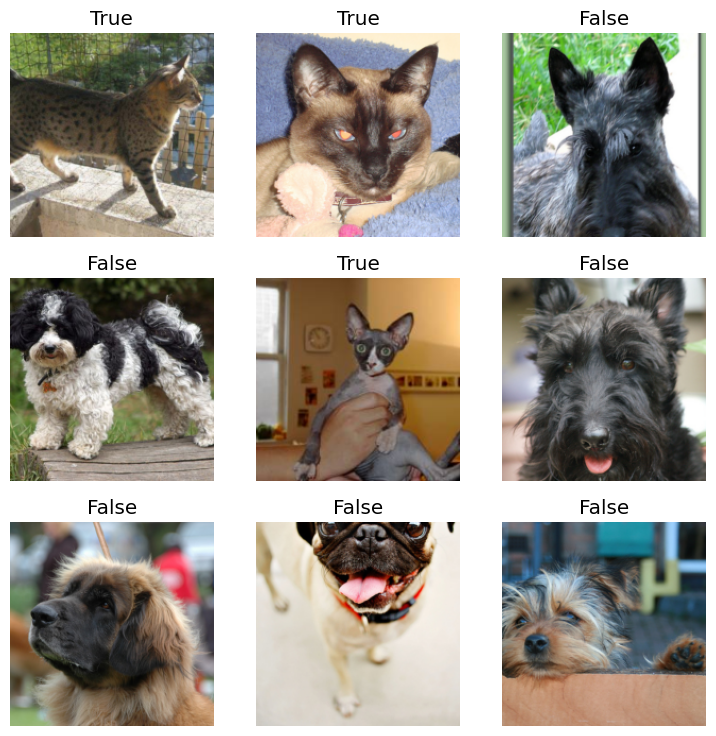

In [7]:
dls.show_batch()

In [8]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.185522,0.070489,0.026387,10:56


epoch,train_loss,valid_loss,error_rate,time
0,0.072648,0.036583,0.009472,11:50
1,0.044510,0.034540,0.012179,9:27:27
2,0.019206,0.024417,0.011502,10:08


In [9]:
learn.export('model.pkl')

In [10]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(learn, f)

In [11]:
#/export
import gradio as gr

In [12]:
# import os
# os.path.isfile('model.pkl')
import torch
print(torch.__version__)



2.1.0+cpu


In [13]:
#/export
learn= load_learner('model.pkl')
learn.predict(im)

RuntimeError: Invalid magic number; corrupt file?

In [ ]:
categories=('Dog','Cat')

def classify_image(img):
    pred,idx,probs=learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [ ]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()
im=PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [ ]:
classify_image(im)

In [ ]:
image=gr.inputs.Image(shape=(192,192))
label=gr.outputs.Label()
examples=['dog.jpg','cat.jpg','dunno.jpg']

intf=gr.Interface(fn=classify_image,inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

In [ ]:
m=learn.model

In [ ]:
from nbdev.export import notebook2script


In [ ]:
notebook2script('app.ipynb')